<a href="https://colab.research.google.com/github/jeba0909/EDA/blob/main/21BDS0320_M7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODULE 7**

In [17]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your PPGE dataset (replace this line if you already have the dataset in the DataFrame 'data')
data = pd.read_csv('/content/PPGE.csv')

# Print the columns of the DataFrame to verify the target column name
print("Available columns in the dataset:", data.columns.tolist())

# Define the target variable (make sure this matches the exact name in your dataset)
target_column = 'govtspendgdp'

# Check if the target column exists in the DataFrame
if target_column not in data.columns:
    raise ValueError(f"The target column '{target_column}' does not exist in the DataFrame.")

# Select numeric columns (if needed, based on your dataset)
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

# Drop rows with NaN in features and target
data_cleaned = data.dropna(subset=numeric_cols + [target_column])

# Define features (X) and target (y)
X = data_cleaned[numeric_cols].drop(target_column, axis=1)
y = data_cleaned[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)



Available columns in the dataset: ['rownames', 'country', 'iso3c', 'year', 'govtspendgdp', 'tradegdp', 'kaopen', 'ka_open', 'v2catrauni', 'v2catrauni_ord']
Mean Squared Error (MSE): 69.91927912974603
R-squared (R²): 0.21773319764803134


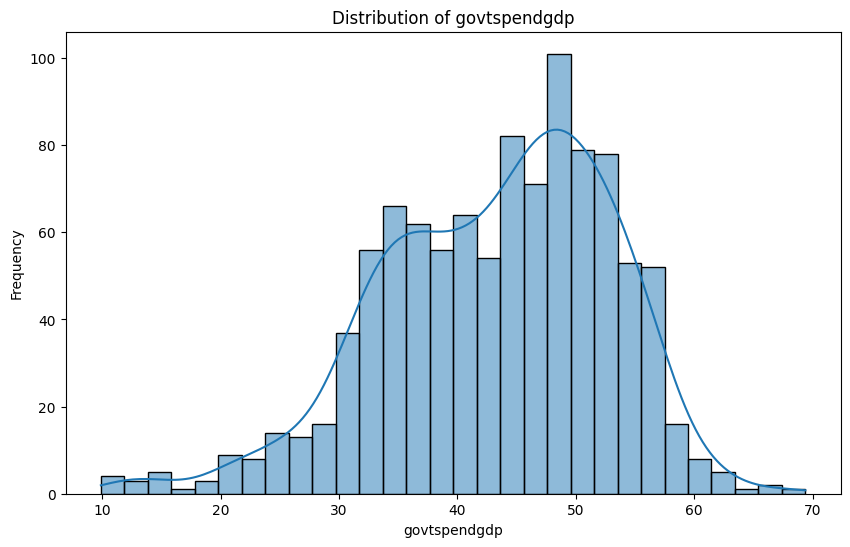

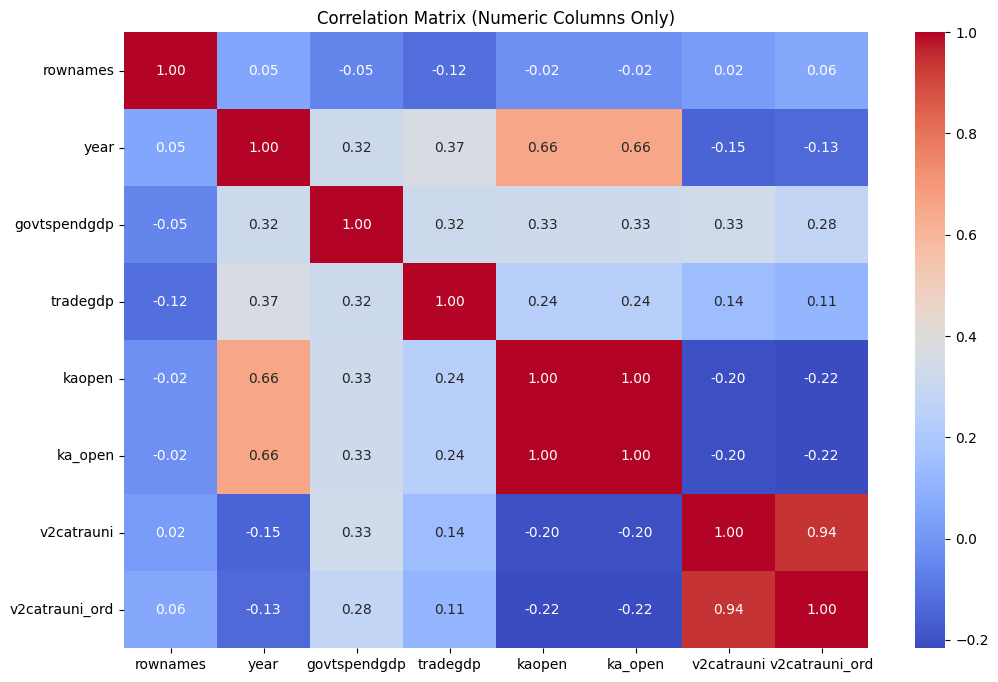

In [24]:
# EDA: Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(data[target_column], bins=30, kde=True)
plt.title(f'Distribution of {target_column}')
plt.xlabel(target_column)
plt.ylabel('Frequency')
plt.show()

# Correlation Matrix for Numeric Columns
plt.figure(figsize=(12, 8))
correlation_matrix = data.select_dtypes(include=['number']).corr()  # Select only numeric columns
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [26]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [27]:
from sklearn.model_selection import GridSearchCV

# Example for Ridge regression
from sklearn.linear_model import Ridge

ridge_model = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)

Best parameters from Grid Search: {'alpha': 10.0}


In [28]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 6.515421103170003


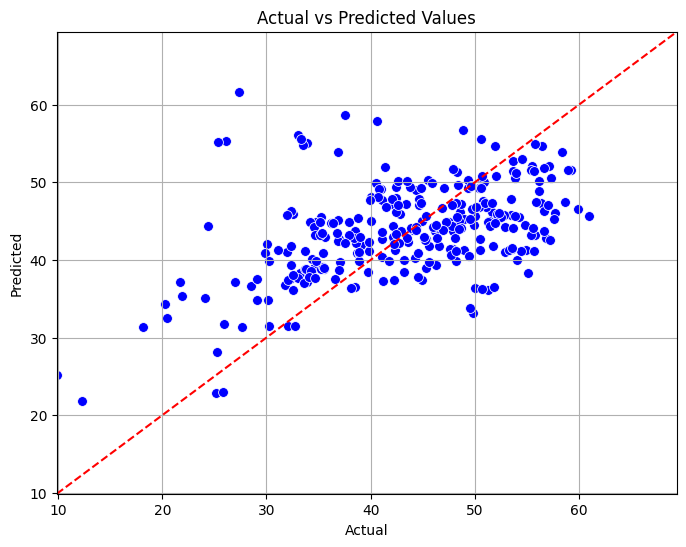

In [18]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", s=50)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")  # Line for perfect predictions
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.xlim([y.min(), y.max()])  # Set x limits to the range of y values
plt.ylim([y.min(), y.max()])  # Set y limits to the range of y values
plt.grid(True)
plt.show()
